<a href="https://colab.research.google.com/github/tomisagoodcat/AST/blob/master/%E5%86%9C%E4%BA%A7%E5%93%81%E8%B4%B8%E6%98%93%E7%BD%91%E7%BB%9C%E6%95%B4%E4%BD%93%E6%80%A7%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**背景**
 本实验基于data science第6章内容，结合networkx面向neo4j中农产品贸易数据进行分析，由于neo4j中缺乏对网络整体分析方法（抑或未发现），采用networkx分析，提供了对农产品贸易网络整体的概况，包括：</br>


> 缩进块

*   列表项
*   列表项





## 0 数据获取与数据处理
数据来源于neo4j数据库，首先更加其数据结构进行处理，面向neo4j抽取节点、边信息。


---
没有找到直接neo4j向networkx转换方法，但适用cql查询后，通过networkx方法转换可控性更强。


In [ ]:
!pip install py2neo

In [ ]:
import py2neo
from py2neo import Graph
import networkx as nx
import numpy as np
graph = Graph("http://47.104.76.130/",auth=("neo4j","123456"))

创建cql查询，获得图数据库中节点与边，并发直接返回为dataframe，由于目前neo4j以及本体设计中分为以下模式：


> demand，offer，aggregate，AggregateOffer，AggregateDemand
 
在构建图时，需要构建对应不同供需图集合，以反映不同类型供需之间关联关系



当前使用用数据集未AggregateOffer->demand，但由于设置错误，AggregateOffer实际应该对应Aggregate（供需），同时目前贸易物流关联中缺少利润、花费时间属性。

In [ ]:
data=graph.run('MATCH p=(a1:Address)<-[:ADDRESS]-(demand:Demand)<-[r:RELATION]-(offer:Aggregateoffer)-[:ADDRESS]->(a2:Address) RETURN offer.productName as productName, id(demand) as demandId, id(offer) as offerId,a2.addressname as offerAddress,a1.addressname as demandAddress,r.distince as distance').to_data_frame()

为了更好比较不同产品贸易网络特征，在data数据集基础上，建立不同产品子数据集，以进一步建立各产品子图分析。

In [ ]:
product=data.loc[:,'productName']
#product.drop_duplicates(inplace = True)
 
productNum=data.groupby(['productName']).size()
productNum.sort_values(ascending=False)

 

productName
太子参（中统）    38
板栗         33
青苹果        27
干辣椒        25
白及（统个）     19
           ..
枇杷          1
糯米鸡         1
樱桃          1
泥鳅          1
黄鳝          1
Length: 68, dtype: int64

In [ ]:
data1=data[data['productName']=='太子参（中统）']
data2=data[data['productName']=='青苹果']
data3=data[data['productName']=='干辣椒']

,productName,demandId,offerId,offerAddress,demandAddress,distance
210,干辣椒,279,276529,织金县宏洲中心农贸市场,绥阳县洋川镇平安大道,239608.0
211,干辣椒,279,257181,兴义市丰源市场,绥阳县洋川镇平安大道,477148.0
212,干辣椒,279,291154,六盘水明湖农贸市场,绥阳县洋川镇平安大道,345940.0
213,干辣椒,279,289745,贵州省锦屏农贸大市场,绥阳县洋川镇平安大道,358767.0
214,干辣椒,279,81254,仁怀市杨堡坝 农贸市场,绥阳县洋川镇平安大道,120376.0
215,干辣椒,279,210919,兴义市克马山综合农贸市场,绥阳县洋川镇平安大道,475051.0
216,干辣椒,279,289861,贵州省万山农贸市场,绥阳县洋川镇平安大道,308868.0
336,干辣椒,459,289745,贵州省锦屏农贸大市场,镇远县江古镇,135344.0
337,干辣椒,459,210919,兴义市克马山综合农贸市场,镇远县江古镇,539574.0
338,干辣椒,459,289861,贵州省万山农贸市场,镇远县江古镇,115934.0


基于networkx的from_pandas_edgelist方法，实现dataframe向networkx转换，见[networkx.convert_matrix.from_pandas_edgelist](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html?highlight=from_pandas_edgelist#networkx.convert_matrix.from_pandas_edgelist)
G1,G2,G3 分别代表不同产品的贸易网络

In [ ]:
import networkx as nx
#G=nx.from_pandas_edgelist(data,'offerId', 'demandId', ['distance', 'costTime'])
G=nx.from_pandas_edgelist(data,'offerId', 'demandId', ['distance'])
G1=nx.from_pandas_edgelist(data1,'offerId', 'demandId', ['distance'])
G2=nx.from_pandas_edgelist(data2,'offerId', 'demandId', ['distance'])
G3=nx.from_pandas_edgelist(data3,'offerId', 'demandId', ['distance'])

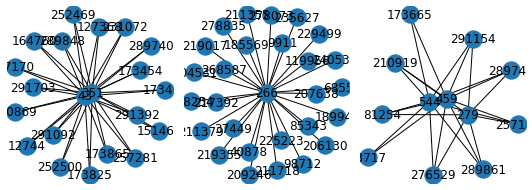

In [ ]:
plt.figure(figsize=(7.5,2.75))
plt.subplot(1,3,1)
nx.draw(G1, with_labels=True)#查看图像
plt.subplot(1,3,2)
nx.draw(G2, with_labels=True)#查看图像
plt.subplot(1,3,3)
nx.draw(G3, with_labels=True)#查看图像
plt.tight_layout()

# 1 网络整体描述


###（1）Diameter and mean shortest path</br>
The distance between all nodes pairs can be found using the shortest_path_leght() function. This function produces an iterator that can be turned into a dict of dict objects, with the keys of the first correponding to source node IDs, and the keys of the second coreesponding to target node IDs.

In [ ]:
length_source_target=dict(nx.shortest_path_length(G))#生成节点最短路径对，并以字典形式保存

### （2）网络最短路径分布
Networks can be characterized according to their** distribution of shortest path lenghts.** The following fucntion draws a histogram of all shortest path lenghts within a network.</br>
得到分析结果后，如何结合其实际经济学意义进行解释更为重要。网络中，路径代表不同地理位置之间有利润有向连接。

In [ ]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum(
        [list(length_target.values()) for length_target in length_source_target.values()],
        [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

In [ ]:
from matplotlib import pyplot as plt
path_length_histogram(G, title='农产品贸易网络最短路径分布')

In [ ]:
#One such measure is the mean shortest path length alos know as the characteristic lenght
average_lenght=nx.average_shortest_path_length(G)
print("农产品贸易网络平均最短路径为"+average_lenght)
nx.diameter(G)

In [ ]:
nx.diameter(G)

###（3）网络容错能力
</br>Resilience is the ability of a system to withstand errors and attacks. Resilience is fundamentally a network property because it is usually achieved with redundant paths. When one path is no longer availabe, the others can still be used.

---
  农产品贸易网络中，容错能力反映当网络中多个贸易路线消失，农产品贸易整体受到影响程度。


In [ ]:
print("农产品贸易网络密度:"+str(nx.density(G)))

农产品贸易网络密度:0.004254487227228718


(4)Minimum cuts
more sophisticated measures of relience are based on the concept of minimum cuts. A minimum cut or min-cut is the number of nodes(or edges)that need be removed to sparate the network into two unconnected parts.
但感觉在农产品贸易中网中意义不是很大。

In [ ]:
import networkx.algorithms.connectivity as nxcon 
nxcon.minimum_st_node_cut(G,1,2)#mini-cut是考虑两个节点间变量，对整体网络没有意义。

###（4）Connectivity 连通性</br>
Minimum cuts can be used to define connectivity measures for entire networks. These measures are very useful for quantifying the relilience of a network.
</br>The node connectivity is the smallest nim-cut over all node paris.将网络分割所需要移走最少节点或边

In [ ]:
nxcon.minimum_node_cut(G)#由于农产品贸易网络为非全联通网络该分析无效

### *（5）Centralization and inequality 
<font color='red'>本部分是考察农产品贸易网络较重要指标</font></br>
Networks can also be callified by how centralized they are-how much of their centrality is concentrated in one ore a few nodes. Unequal distributions are more centralized. As an example, the most centralized network would be all nodes connectred to a single hub node.*斜体文本*

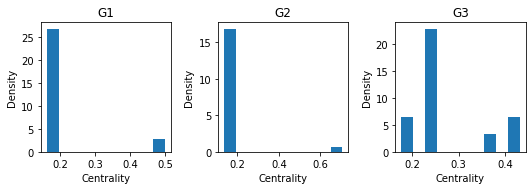

In [ ]:
#function to plot a single histogram 
def centrality_histogram(x,title=None):
  plt.hist(x,density=True)
  plt.title(title)
  plt.xlabel("Centrality")
  plt.ylabel("Density")
plt.figure(figsize=(7.5,2.75))
plt.subplot(1,3,1)
centrality_histogram(nx.eigenvector_centrality(G1,max_iter=1000).values(),title="G1")
plt.subplot(1,3,2)
centrality_histogram(nx.eigenvector_centrality(G2,max_iter=1000).values(),title="G2")
plt.subplot(1,3,3)
centrality_histogram(nx.eigenvector_centrality(G3,max_iter=1000).values(),title="G3")
plt.tight_layout()

网络不平等性与集中性可以结合香农，[香浓信息熵](https://zh.wikipedia.org/wiki/%E7%86%B5_(%E4%BF%A1%E6%81%AF%E8%AE%BA))，基尼指数进行分析。其中基尼指数越接近1，说明网络集中度越高，不平等越严重。分析发现，xx产品在时间区间内基于集中性的信息熵（6.69）与基尼指数（0.602）都偏高，说明农产品贸易网络集中程度较高，可能发生地区间贸易集中现象。

In [ ]:
import math
def entropy(x):
  total=sum(x)
  x=[xi/total for xi in x]
  H=sum([-xi*math.log2(xi) for xi in x])
  return H
G1_en=entropy(nx.eigenvector_centrality(G1,max_iter=1000).values())
G2_en=entropy(nx.eigenvector_centrality(G2,max_iter=1000).values())
G3_en=entropy(nx.eigenvector_centrality(G3,max_iter=1000).values())
print(G1_en,G2_en,G3_en)

4.2554991698219204 4.625118471647159 3.526218658817222


In [ ]:
def gini(x):
    x = [xi for xi in x]
    n = len(x)
    gini_num = sum([sum([abs(x_i - x_j) for x_j in x]) for x_i in x])
    gini_den = 2.0 * n * sum(x)
    return gini_num / gini_den
G1_gini=gini(nx.eigenvector_centrality(G1,max_iter=1000).values())
G2_gini=gini(nx.eigenvector_centrality(G2,max_iter=1000).values())
G3_gini=gini(nx.eigenvector_centrality(G3,max_iter=1000).values())
print(G1_gini,G2_gini,G3_gini)

0.14972668675661713 0.12567666770171743 0.14659132717656845


# 2 In-Between-Communities 
社群分析

### （1）Modularity Maximization
One approach to finding such a partition is to define a function that quantifies the quality of a set of partitions, and then adjust the partition to maximize the quality. </br>
One popular qulity measure is claaed **modularity**. The general idea is that edges within communities should be more common than edges across communities. </br>
在图数据中，社区是一个节点簇，具有相对较高密度的内部连接。社区就是具有高模块性（high modularity）的一个节点集合。社区可能彼此重叠、嵌套，使得上层社区由局部社区组成。


> When using community detection algorithms, we need to be conscious of the density of the relationships in the subgraphs on which we’re running the algorithm. If it’s very dense and all nodes are connected to each other, we may end up with all nodes congregating in one cluster. On the other hand if it’s too sparse and few nodes are connected, then we may end up with each node in its own cluster.
</br> The function below implements  Clauset_Newman-Moore cummunity detection. Each node begins as its own commnity. The two commnities that most increse the modularity are then merged(know as a greedy strategy), this is repeated until merging any further would decrease the modularity. 


In [ ]:
import networkx.algorithms.community as nxcom
communities=sorted(nxcom.greedy_modularity_communities(G),key=len,reverse=True)
len(communities)#返回得到的聚集数目

9

可视化聚集结果，定义可视化相关函数

In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [ ]:
set_node_community(G,communities)
set_edge_community(G)
# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [ ]:
karate_pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
plt.figure(figsize=(20,20))
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

# 3 中心性
Centrality algorithms are used to find the most influential nodes in a graph. Many of these algorithms were invented in the field of social network analysis.


> 度：节点的度（degree），包括出度、入度，是连接到给定节点的边数。度为0的节点是没有边的节点，是孤立节点。度为1的节点只有1个边，即叶子节点(leaf node)</br>考虑到整个图时，平均度（average degree）是所有节点度的平均值。平均度高时，每个节点都有很高连通性，图连接比较稠密，有大量的边，而稠密的图一般更难布局。</br>最大度（maximum degree）特别值得注意。例如在社交网络中，具有最大度节点是最多相连节点的节点，在病毒传播中是重点对象。




## （1）中心度（centrality）的概念用来识别位于图中心的节点，测量方法包括：


1.   度中心度（degree centrality）
2.   间距中心度（betweenness centrality）
3.   紧密中心度（closeness centrality）
4.   Katz中心度
5.   特征向量中心度（Eigenvector centrality）
6.   pagerank



#### 1)特征向量中心度
是一种递归方法，如果某个节点的邻接节点是中心节点，那么该节点很可能也是中心节点。

In [ ]:
import pandas as pd
eigenvector=nx.eigenvector_centrality(G)
eigenvector_score=sorted(eigenvector.items(),key=lambda x:x[1],reverse=True)[0:10]
type(eigenvector_score)
#通过把计算结果转为pandas与原始数据对比，返回结果
#eigenvector
e_pd=pd.DataFrame.from_dict(eigenvector, orient='index',columns=['eigenvector_score'])#将得到结果（dic）转换为dataframe
e2=e_pd.reset_index()#将dataframe中index转换为column，默认列名为index
#e2.rename(columns = {"index": "nodeId"})#重新命名index列为nodeId
 

PowerIterationFailedConvergence: ignored

In [ ]:
#e2.sort_values(by='index',ascending=False)
offer=data.loc[:,['offerId','offer.addressname']]#选取列
offer=offer.drop_duplicates('offerId')

In [ ]:
e2=pd.merge(left=offer, right=e2, left_on='offerId', right_on='index')
#e3.loc[:,['offer.addressname','eigenvector_score']]
e2=e2.drop_duplicates('offer.addressname')
e2.sort_values(by='eigenvector_score',ascending=False)

,offerId,offer.addressname,index,eigenvector_score
7,292857,盘州农贸市场,292857,2.461461e-01
12,291994,望谟县丽甲习农特市场,291994,2.436417e-01
3,290987,贵州省锦屏农贸大市场,290987,1.555420e-01
37,292640,普安县金桥农贸市场,292640,1.544346e-01
26,291424,瓮安县文峰农贸市场,291424,1.531459e-01
...,...,...,...,...
91,292673,河南三门峡市灵宝市,292673,2.140293e-04
90,292372,山东临沂市蒙阴县,292372,2.140293e-04
85,291093,福建漳州市东山县,291093,4.907910e-06
47,292699,北京京丰岳各庄农副产品批发市场,292699,1.088315e-29


In [ ]:
def get_score_name(e,left_on_name):
  e=e.reset_index()
  e=pd.merge(left=offer, right=e, left_on=left_on_name, right_on='index')
  #e3.loc[:,['offer.addressname','eigenvector_score']]
  e=e.drop_duplicates('offer.addressname')
  e.sort_values(by='score',ascending=False)
  return e


#### 2）紧密中心度（Closeness centrality)
测量从每个节点到其他所有节点平均距离。</br>
Measures how central a node is within its cluster. Nodes with the shortest paths to all other nodes are assumed to be able to reach the entire group the fastest.


> Closeness Centrality is applicable in a number of resource, communication and behavioral analyses, especially when interaction speed is significant. It has been used in identifying the best location of new public services for maximum accessibility.In social analysis, it helps find people with the ideal social network location for faster dissemination of information.



In [ ]:
closeness=nx.closeness_centrality(G)
e3=pd.DataFrame.from_dict(eigenvector, orient='index',columns=['score'])
e3=get_score_name(e3,'offerId')
e3

NameError: ignored

### 4)pagerank
pagerank中心度，Estimates a current node’s importance from its linked neighbors and then again from their neighbors. A node’s rank is derived from the number and quality of its transitive links to estimate influence. Although popularized by Google, it’s widely recognized as a way of detecting influential nodes in any networks.


> PageRank is used to estimate importance and influence. It’s used to suggest Twitter accounts to follow and for general sentiment analysis. PageRank is also used in machine learning to identify the most influential features for extraction as well as ranking text for entity relevance in natural language processing.
In biology, it’s been used to identify which species extinctions within a food web would lead to the biggest chain-reaction of species death.
[netWorkx中对应解释](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)



In [ ]:
e_pagerank=nx.pagerank(G)

In [ ]:
e4=pd.DataFrame.from_dict(e_pagerank, orient='index',columns=['score'])
e4=get_score_name(e4,'offerId')

NameError: ignored

In [ ]:
e4

,offerId,offer.addressname,index,score
0,291804,湄潭县中国茶城,291804,0.003922
1,291036,六盘水明湖农贸市场,291036,0.008828
2,291608,钟山区康乐农贸市场,291608,0.005897
3,290987,贵州省锦屏农贸大市场,290987,0.012647
4,292980,黎平县水果批发市场,292980,0.003021
...,...,...,...,...
110,291587,陕西宝鸡市凤县,291587,0.002667
111,293051,云南昭通市鲁甸县,293051,0.002667
112,291656,陕西渭南市华州区,291656,0.002667
113,292941,广西南宁市西乡塘区,292941,0.002667
